<a href="https://colab.research.google.com/github/Muiiya/research/blob/main/LSTM_MODEL_Tesla3Y_1M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d2b67cc2-b110-fa60-bef4-1fe19b842cd6)


In [2]:
!nvidia-smi

Thu May 13 05:10:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [4]:
#Memory(that we can use)

!free -h --si | awk  '/Mem:/{print $2}'

13G


In [5]:
#hard disk space that we can use

!df -h / | awk '{print $4}'

Avail
30G


In [6]:
import torch
import tensorflow as tf
import keras
import numpy
import matplotlib
import pandas


!pip list | grep scikit-learn
print(matplotlib.__version__)
print(pandas.__version__)
print(numpy.__version__)
print(torch.__version__)
print(tf.__version__)
print(keras.__version__)

scikit-learn                  0.22.2.post1  
3.2.2
1.1.5
1.19.5
1.8.1+cu101
2.4.1
2.4.3


In [7]:
import sys

print("--sys.version- ")
print(sys.version)

--sys.version- 
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [8]:
!pip install -U finance-datareader

In [9]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
from dateutil.parser import parse
import matplotlib as mpl
import FinanceDataReader as fdr
fdr.__version__

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [10]:
TESLA = 'TSLA'
df_TESLA = fdr.DataReader(TESLA, '2018-05-12', '2021-05-12')
df_TESLA.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-05-14,58.39,60.66,60.99,58.32,36430000.0,-0.0302
2018-05-15,56.84,57.00,57.39,56.10,47600000.0,-0.0265
2018-05-16,57.30,56.77,57.76,56.31,28370000.0,0.0081
2018-05-17,56.91,57.18,57.84,56.79,22100000.0,-0.0068
2018-05-18,55.36,56.93,56.93,54.80,36260000.0,-0.0272


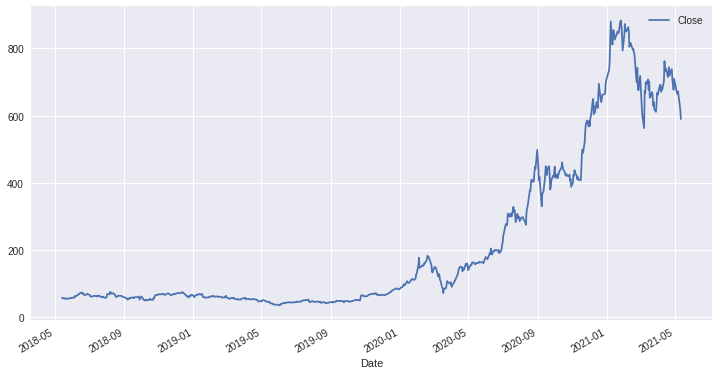

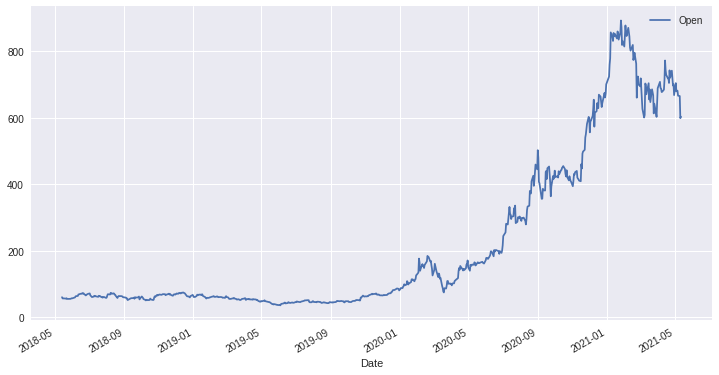

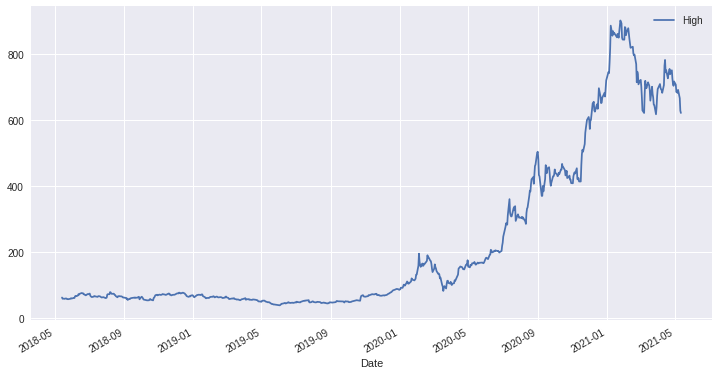

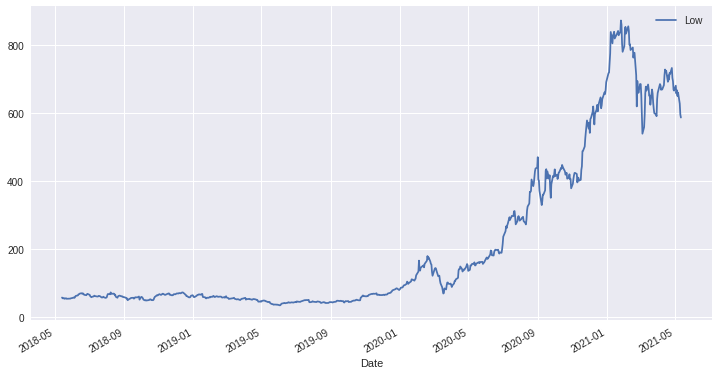

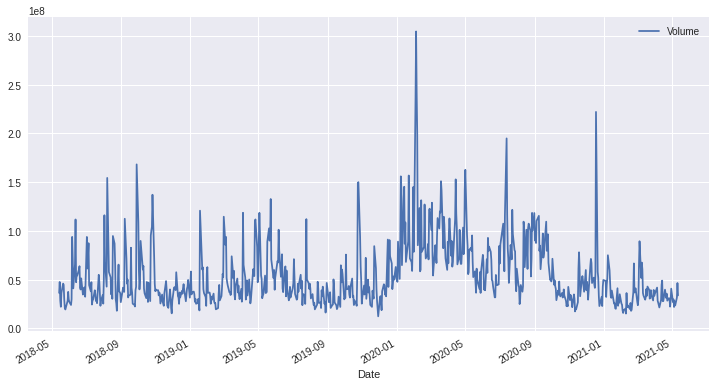

In [11]:
columns = ['Close']
df_TESLA[columns].plot(figsize=(12.2,6.4))

columns = ['Open']
df_TESLA[columns].plot(figsize=(12.2,6.4))

columns = ['High']
df_TESLA[columns].plot(figsize=(12.2,6.4))

columns = ['Low']
df_TESLA[columns].plot(figsize=(12.2,6.4))

columns = ['Volume']
df_TESLA[columns].plot(figsize=(12.2,6.4))

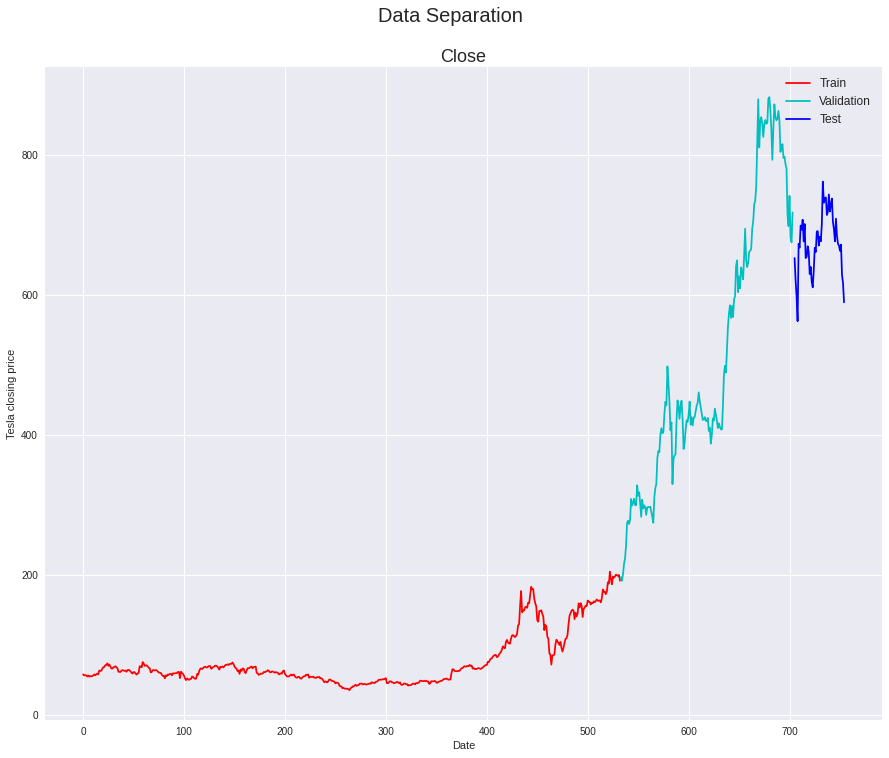

In [12]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

ax2 = fig.add_subplot()
ax2.plot(np.arange(533), df_TESLA['Close'][:533], 'r', label='Train')

ax2.plot(np.arange(533,704), df_TESLA['Close'][533:704], 'c', label='Validation')

ax2.plot(np.arange(705,755), df_TESLA['Close'][705:755], 'b', label='Test')
ax2.set_xlabel('Date')
ax2.set_ylabel('Tesla closing price')
ax2.set_title("Close", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [13]:
df_Tesla=df_TESLA
df_Tesla = df_Tesla.loc[:, ['Close']]
df_Tesla['Close']

Date
2018-05-14     58.39
2018-05-15     56.84
2018-05-16     57.30
2018-05-17     56.91
2018-05-18     55.36
               ...  
2021-05-06    663.54
2021-05-07    672.37
2021-05-10    629.04
2021-05-11    617.20
2021-05-12    589.89
Name: Close, Length: 755, dtype: float64

In [14]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='2018-05-12', 
                                                end='2021-05-12'))

df_all_dates

""
2018-05-12
2018-05-13
2018-05-14
2018-05-15
2018-05-16
...
2021-05-08
2021-05-09
2021-05-10
2021-05-11


In [15]:
# 가능한 모든 날짜로 DataFrame을 만들고 가격을 결합합니다

df_Tesla = df_all_dates.join(df_Tesla['Close'], how='left').fillna(method='ffill').asfreq('D')
df_Tesla = df_Tesla.dropna()

df_Tesla

,Close
2018-05-14,58.39
2018-05-15,56.84
2018-05-16,57.30
2018-05-17,56.91
2018-05-18,55.36
...,...
2021-05-08,672.37
2021-05-09,672.37
2021-05-10,629.04
2021-05-11,617.20


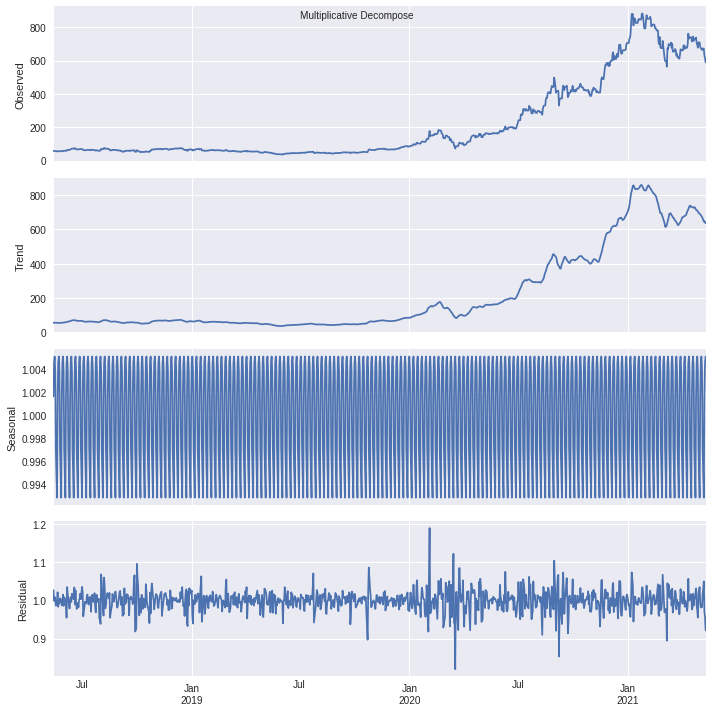

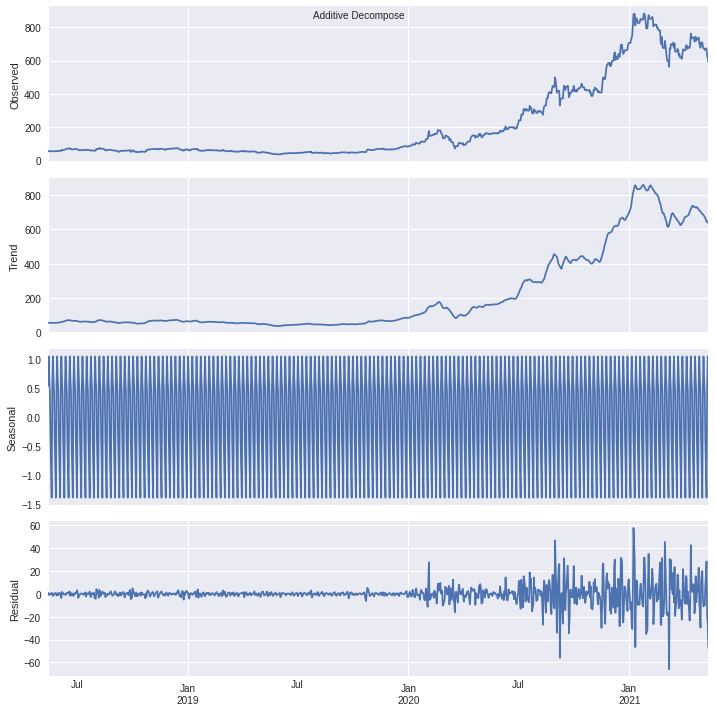

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
 

# 곱하기(승법적) 분해  
result_mul = seasonal_decompose(df_Tesla['Close'], model='multiplicative', extrapolate_trend='freq')
 
# 더하기(가법적) 분해 
result_add = seasonal_decompose(df_Tesla['Close'], model='additive', extrapolate_trend='freq')
 
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

In [17]:
df = df_TESLA
for col in df.columns:
    df['r_'+col] = 100*df[col].pct_change()
    
df.dropna(inplace=True)
df.head()
df

,Close,Open,High,Low,Volume,Change,r_Close,r_Open,r_High,r_Low,r_Volume,r_Change
Date,,,,,,,,,,,,
2018-05-15,56.84,57.00,57.39,56.10,47600000.0,-0.0265,-2.654564,-6.033630,-5.902607,-3.806584,30.661543,-12.251656
2018-05-16,57.30,56.77,57.76,56.31,28370000.0,0.0081,0.809289,-0.403509,0.644712,0.374332,-40.399160,-130.566038
2018-05-17,56.91,57.18,57.84,56.79,22100000.0,-0.0068,-0.680628,0.722212,0.138504,0.852424,-22.100811,-183.950617
2018-05-18,55.36,56.93,56.93,54.80,36260000.0,-0.0272,-2.723599,-0.437216,-1.573306,-3.504138,64.072398,300.000000
2018-05-21,56.90,56.27,58.30,56.26,45910000.0,0.0278,2.781792,-1.159318,2.406464,2.664234,26.613348,-202.205882
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,663.54,680.69,680.78,650.00,27780000.0,-0.0110,-1.102930,-0.054327,-0.659565,-2.598376,26.849315,182.051282
2021-05-07,672.37,665.80,690.00,660.22,23470000.0,0.0133,1.330741,-2.187486,1.354329,1.572308,-15.514759,-220.909091
2021-05-10,629.04,664.79,664.79,627.72,31390000.0,-0.0644,-6.444368,-0.151697,-3.653623,-4.922602,33.745207,-584.210526


 # ADF Test
 > 귀무(영) 가설(null hypothesis)은 시계열 데이터가 단위 근을 포함하고 
 Non-stationary다. 따라서 ADF Test에서 P값이 유의값 0.05 보다 작으면 
 귀무가설은 기각된다 -> Stationary time-series

In [18]:
n_obs = 20
df_train, df_test = df[0:-n_obs], df[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
print('ADF Test: Open Time series')
adf_test(df_train['r_Open'])

print('ADF Test: High Time series')
adf_test(df_train['r_High'])

print('ADF Test: Low Time series')
adf_test(df_train['r_Low'])

print('ADF Test: Close Time series')
adf_test(df_train['r_Close'])

print('ADF Test: Volume Time series')
adf_test(df_train['r_Volume'])

ADF Test: Open Time series
ADF Statistics: -27.363484
p-value: 0.000000
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test: High Time series
ADF Statistics: -24.071965
p-value: 0.000000
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test: Low Time series
ADF Statistics: -24.216055
p-value: 0.000000
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test: Close Time series
ADF Statistics: -27.634144
p-value: 0.000000
Critical values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
ADF Test: Volume Time series
ADF Statistics: -8.405196
p-value: 0.000000
Critical values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


 # KPSS Test
 > Trend Stationary를 Test하는데 사용된다. 귀무 가설과 P값 해석은 ADH Test와 반대이다. 따라서 KPSS Test에서 P값이 유의값 0.05 보다 크면 Trend Stationary이다. 귀무가설은 기각된다 -> Stationary time-series

In [19]:
from statsmodels.tsa.stattools import kpss

# p-value<0.05이므로 귀무 가설을 기각할 수 없습니다. -> 안정x

def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'{key} : {value}')
        
print('KPSS Test: Open Time series')
kpss_test(df_train['r_Open'])

print('KPSS Test: High Time series')
kpss_test(df_train['r_High'])

print('KPSS Test: Low Time series')
kpss_test(df_train['r_Low'])

print('KPSS Test: Close Time series')
kpss_test(df_train['r_Close'])

print('KPSS Test: Volume Time series')
kpss_test(df_train['r_Volume'])

KPSS Test: Open Time series
KPSS Statistic: 0.46803645369297425
p-value: 0.04886566358266346
num lags: 20
Critial Values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
KPSS Test: High Time series
KPSS Statistic: 0.42286435487052676
p-value: 0.06729984703856606
num lags: 20
Critial Values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
KPSS Test: Low Time series
KPSS Statistic: 0.4217124753809002
p-value: 0.06779634681857752
num lags: 20
Critial Values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
KPSS Test: Close Time series
KPSS Statistic: 0.41161434891097937
p-value: 0.07214898753837097
num lags: 20
Critial Values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
KPSS Test: Volume Time series
KPSS Statistic: 0.45113278234450405
p-value: 0.05511518002392068
num lags: 20
Critial Values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739


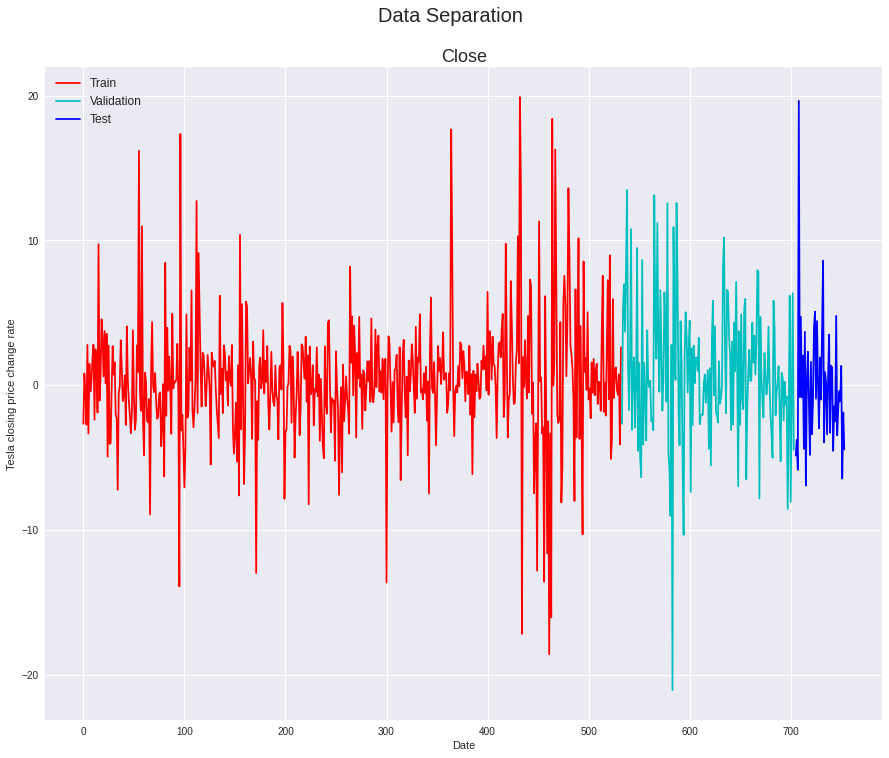

In [20]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

ax2 = fig.add_subplot()
ax2.plot(np.arange(533), df['r_Close'][:533], 'r', label='Train')

ax2.plot(np.arange(533,704), df['r_Close'][533:704], 'c', label='Validation')

ax2.plot(np.arange(705,754), df['r_Close'][705:754], 'b', label='Test')
ax2.set_xlabel('Date')
ax2.set_ylabel('Tesla closing price change rate')
ax2.set_title("Close", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [21]:
scaler = MinMaxScaler()
scale_cols = ['r_Open', 'r_High', 'r_Low', 'r_Close', 'r_Volume']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
print(df_scaled)

       r_Open    r_High     r_Low   r_Close  r_Volume
0    0.288747  0.302503  0.298589  0.449405  0.165699
1    0.396702  0.459105  0.404754  0.533969  0.053053
2    0.418288  0.446997  0.416894  0.497596  0.082060
3    0.396056  0.406053  0.306269  0.447720  0.218663
4    0.382210  0.501243  0.462901  0.582124  0.159282
..        ...       ...       ...       ...       ...
749  0.403398  0.427908  0.329269  0.487286  0.159656
750  0.362495  0.476077  0.435174  0.546700  0.092500
751  0.401531  0.356295  0.270250  0.356884  0.170588
752  0.212835  0.307720  0.267743  0.468260  0.193401
753  0.418443  0.416981  0.356448  0.406188  0.073867

[754 rows x 5 columns]


In [22]:
# 20일 학습하고 그 다음날 종가예측
# 테스트 기간은 21일, 따라서 5299-21 : train / 21 : test

window_size = 20
TEST_SIZE = 50

In [23]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [24]:
test.describe()

,r_Open,r_High,r_Low,r_Close,r_Volume
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.399728,0.437904,0.389370,0.509123,0.124575
std,0.089003,0.082372,0.100458,0.109487,0.048102
min,0.212835,0.298441,0.139163,0.344977,0.048635
25%,0.338994,0.381834,0.325694,0.431302,0.092632
50%,0.387708,0.423739,0.380581,0.492676,0.113379
75%,0.450296,0.483633,0.455876,0.559023,0.160200
max,0.702488,0.667690,0.657450,0.993718,0.304476


In [25]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [26]:
from sklearn.model_selection import train_test_split

feature_cols = ['r_Open', 'r_High', 'r_Low', 'r_Volume']
label_cols = ['r_Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train set : 모델을 학습하는 유일한 dataset
# validation set : 학습이 이미 완료된 모델을 검증하기 위한 dataset(비율 0.25) 

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.25)

x_train.shape, x_valid.shape

# test dataset : 학습과 검증이 완료된 모델의 성능을 평가하기 위한 dataset
x_test = test[feature_cols]
y_test = test[label_cols]

x_test.shape, y_test.shape

((50, 4), (50, 1))

In [27]:
x_test, y_test = make_dataset(x_test, y_test, 20)

x_test.shape, y_test.shape
# (21-20, 20, 4),     (21-20, 1)

((30, 20, 4), (30, 1))

In [28]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, x_test.shape, y_test.shape

((513, 20, 4), (171, 20, 4), (513, 1), (171, 1), (30, 20, 4), (30, 1))

In [29]:
# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(df_scaled),4),
                                                       round(len(y_valid)/len(df_scaled),4),
                                                       round(len(y_test)/len(df_scaled),4)))

train: 0.6804% | validation: 0.2268% | test 0.0398%


In [30]:
train.describe()

,r_Open,r_High,r_Low,r_Close,r_Volume
count,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.413226,0.454084,0.406359,0.525151,0.131490
std,0.089188,0.098613,0.106222,0.108002,0.085976
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.367334,0.407006,0.357427,0.470665,0.078413
50%,0.410612,0.449236,0.410015,0.520421,0.110583
75%,0.452850,0.491740,0.453699,0.572387,0.155435
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
test.describe()

,r_Open,r_High,r_Low,r_Close,r_Volume
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.399728,0.437904,0.389370,0.509123,0.124575
std,0.089003,0.082372,0.100458,0.109487,0.048102
min,0.212835,0.298441,0.139163,0.344977,0.048635
25%,0.338994,0.381834,0.325694,0.431302,0.092632
50%,0.387708,0.423739,0.380581,0.492676,0.113379
75%,0.450296,0.483633,0.455876,0.559023,0.160200
max,0.702488,0.667690,0.657450,0.993718,0.304476


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
keras.layers.BatchNormalization()

model = Sequential()
model.add(LSTM(units = 128, return_sequences = True,  
               input_shape=(x_test.shape[1], x_test.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 128))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 128)           68096     
_________________________________________________________________
dropout (Dropout)            (None, 20, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               1

In [35]:
# val_loss가 10회 같을 시 early_stop, batch_size(=K)는 K문제 풀고 답보고 하는 식
# 위에서 모델을 구성한 후 compile 메서드를 호출하여 학습과정을 설정합니다
# optimizer : 훈련 과정을 설정한다
# loss : 최적화 과정에서 최소화될 손실 함수(loss function)을 설정합니다
# metrics : 훈련을 모니터링하기 위해 사용됩니다
# validation_data = 검증 데이터를 사용합니다. 각 에포크마다 정확도도 함께 출력됩니다
# 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증데이터를 학습하지는 않습니다
# 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 overfitting의 신호입니다
# verbose / 0 : 출력 없음 / 1 : 훈련 진행도 보여주는 진행 막대 보여줌 / 2 : 미니 배치마다 손실 정보 출력

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def MPE(y_true, y_pred): 
    return K.mean((y_true - y_pred) / y_true) * 100
    
def MSLE(y_true, y_pred):
    return K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1)

def RMSLE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1))

def R2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))
    
model.compile(loss = RMSE, optimizer='adam', metrics=[soft_acc, 'mse', 'mae', RMSE, 'mape', MPE, MSLE, RMSLE, R2])

early_stop = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=2,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# score_test를 만들면 테스트가 더이상 테스트가 아니고, 처음부터 모든 데이터에 대해 학습한 것과 같기 때문에 일반화 할 수 없는 모델을 만드는 것과 같다.


score_train = model.evaluate(x_train, y_train, batch_size=2)
score_validation = model.evaluate(x_valid, y_valid, batch_size=2)

Epoch 1/200
257/257 [==============================] - 40s 17ms/step - loss: 0.1595 - soft_acc: 0.4660 - mse: 0.0396 - mae: 0.1466 - RMSE: 0.1595 - mape: 32.2279 - MPE: 0.3036 - MSLE: 0.0193 - RMSLE: 0.0999 - R2: -578.6978 - val_loss: 0.0898 - val_soft_acc: 0.4942 - val_mse: 0.0129 - val_mae: 0.0784 - val_RMSE: 0.0903 - val_mape: 2984205.7500 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0522 - val_R2: -3599.3696

Epoch 00001: val_loss improved from inf to 0.08977, saving model to tmp/ckeckpointer.ckpt


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


Epoch 2/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0962 - soft_acc: 0.5439 - mse: 0.0140 - mae: 0.0850 - RMSE: 0.0962 - mape: 17.9541 - MPE: -3.7417 - MSLE: 0.0058 - RMSLE: 0.0553 - R2: -1054.3205 - val_loss: 0.0915 - val_soft_acc: 0.6279 - val_mse: 0.0133 - val_mae: 0.0795 - val_RMSE: 0.0917 - val_mape: 3197019.0000 - val_MPE: -inf - val_MSLE: 0.0063 - val_RMSLE: 0.0530 - val_R2: -2164.2981

Epoch 00002: val_loss did not improve from 0.08977
Epoch 3/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0931 - soft_acc: 0.5507 - mse: 0.0125 - mae: 0.0832 - RMSE: 0.0931 - mape: 18.5101 - MPE: -4.5157 - MSLE: 0.0054 - RMSLE: 0.0545 - R2: -234.9280 - val_loss: 0.0893 - val_soft_acc: 0.6453 - val_mse: 0.0129 - val_mae: 0.0777 - val_RMSE: 0.0898 - val_mape: 2952805.0000 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0518 - val_R2: -3496.8303

Epoch 00003: val_loss improved from 0.08977 to 0.08934, saving model to tmp/ckeckpointer.ckpt


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


Epoch 4/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0970 - soft_acc: 0.5360 - mse: 0.0141 - mae: 0.0855 - RMSE: 0.0970 - mape: 20.4659 - MPE: -6.8179 - MSLE: 0.0061 - RMSLE: 0.0561 - R2: -98.3884 - val_loss: 0.0982 - val_soft_acc: 0.6279 - val_mse: 0.0144 - val_mae: 0.0851 - val_RMSE: 0.0983 - val_mape: 3272948.5000 - val_MPE: -inf - val_MSLE: 0.0068 - val_RMSLE: 0.0565 - val_R2: -1734.1273

Epoch 00004: val_loss did not improve from 0.08934
Epoch 5/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0943 - soft_acc: 0.5289 - mse: 0.0136 - mae: 0.0837 - RMSE: 0.0943 - mape: 21.2230 - MPE: -8.1171 - MSLE: 0.0061 - RMSLE: 0.0554 - R2: -508.6407 - val_loss: 0.0899 - val_soft_acc: 0.4593 - val_mse: 0.0130 - val_mae: 0.0782 - val_RMSE: 0.0904 - val_mape: 2930736.0000 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0521 - val_R2: -3596.2241

Epoch 00005: val_loss did not improve from 0.08934
Epoch 6/200
257/257 [==============================] - 

INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


Epoch 7/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0960 - soft_acc: 0.5645 - mse: 0.0150 - mae: 0.0852 - RMSE: 0.0960 - mape: 19.7463 - MPE: -5.4534 - MSLE: 0.0063 - RMSLE: 0.0556 - R2: -661.3992 - val_loss: 0.0883 - val_soft_acc: 0.6279 - val_mse: 0.0128 - val_mae: 0.0770 - val_RMSE: 0.0887 - val_mape: 3075914.0000 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0513 - val_R2: -2653.3826

Epoch 00007: val_loss did not improve from 0.08830
Epoch 8/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0993 - soft_acc: 0.5282 - mse: 0.0150 - mae: 0.0870 - RMSE: 0.0993 - mape: 25.3163 - MPE: -13.0599 - MSLE: 0.0068 - RMSLE: 0.0575 - R2: -1283.8184 - val_loss: 0.0935 - val_soft_acc: 0.6279 - val_mse: 0.0136 - val_mae: 0.0809 - val_RMSE: 0.0937 - val_mape: 3198233.5000 - val_MPE: -inf - val_MSLE: 0.0065 - val_RMSLE: 0.0539 - val_R2: -2017.1823

Epoch 00008: val_loss did not improve from 0.08830
Epoch 9/200
257/257 [==============================]

INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


Epoch 12/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0850 - soft_acc: 0.5772 - mse: 0.0116 - mae: 0.0734 - RMSE: 0.0850 - mape: 16.4345 - MPE: -3.6539 - MSLE: 0.0050 - RMSLE: 0.0480 - R2: -107.6941 - val_loss: 0.0880 - val_soft_acc: 0.6279 - val_mse: 0.0128 - val_mae: 0.0767 - val_RMSE: 0.0884 - val_mape: 3046837.7500 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0511 - val_R2: -2804.2212

Epoch 00012: val_loss did not improve from 0.08798
Epoch 13/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0861 - soft_acc: 0.5654 - mse: 0.0111 - mae: 0.0747 - RMSE: 0.0861 - mape: 17.3093 - MPE: -4.7720 - MSLE: 0.0048 - RMSLE: 0.0490 - R2: -1200.5374 - val_loss: 0.0884 - val_soft_acc: 0.6279 - val_mse: 0.0128 - val_mae: 0.0770 - val_RMSE: 0.0888 - val_mape: 3075628.5000 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0514 - val_R2: -2638.6226

Epoch 00013: val_loss did not improve from 0.08798
Epoch 14/200
257/257 [=============================

INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/ckeckpointer.ckpt/assets


Epoch 22/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0873 - soft_acc: 0.5943 - mse: 0.0116 - mae: 0.0769 - RMSE: 0.0873 - mape: 18.0090 - MPE: -5.7693 - MSLE: 0.0050 - RMSLE: 0.0504 - R2: -34.4234 - val_loss: 0.0898 - val_soft_acc: 0.6279 - val_mse: 0.0130 - val_mae: 0.0781 - val_RMSE: 0.0903 - val_mape: 2925412.0000 - val_MPE: -inf - val_MSLE: 0.0060 - val_RMSLE: 0.0521 - val_R2: -3589.6206

Epoch 00022: val_loss did not improve from 0.08793
Epoch 23/200
257/257 [==============================] - 3s 12ms/step - loss: 0.0950 - soft_acc: 0.5527 - mse: 0.0144 - mae: 0.0824 - RMSE: 0.0950 - mape: 17.7449 - MPE: -4.7795 - MSLE: 0.0060 - RMSLE: 0.0537 - R2: -190.5611 - val_loss: 0.0919 - val_soft_acc: 0.3721 - val_mse: 0.0134 - val_mae: 0.0805 - val_RMSE: 0.0924 - val_mape: 2881655.7500 - val_MPE: -inf - val_MSLE: 0.0061 - val_RMSLE: 0.0537 - val_R2: -3906.6265

Epoch 00023: val_loss did not improve from 0.08793
Epoch 24/200
257/257 [==============================]

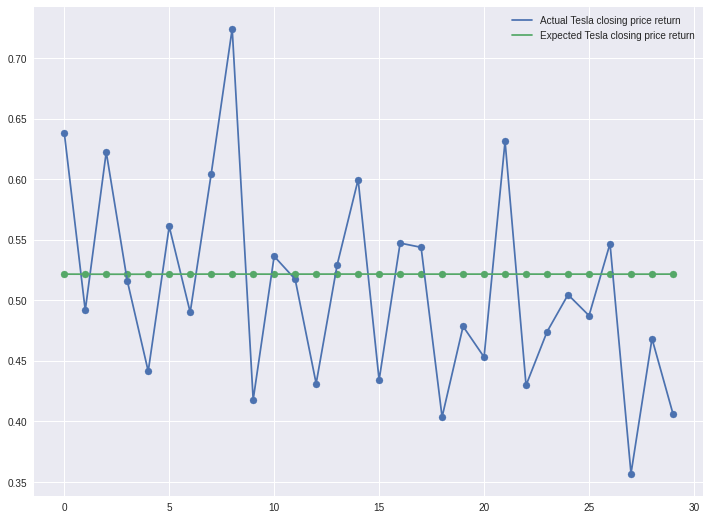

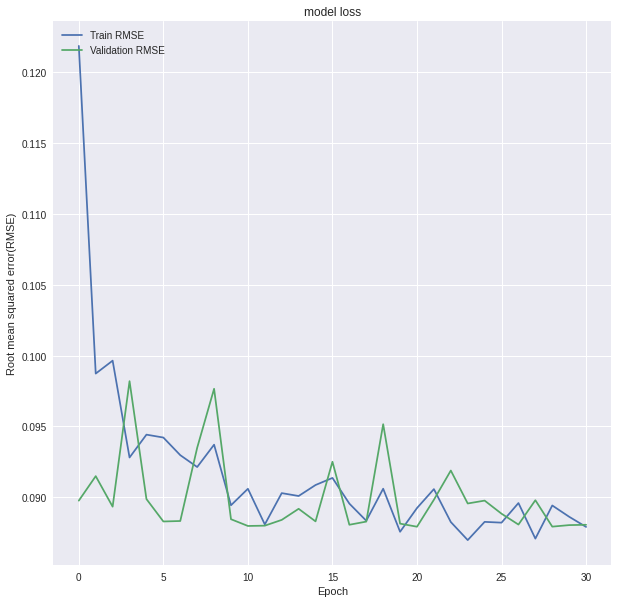

In [36]:
pred = model.predict(x_test)
pred.shape

plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test), label='Actual Tesla closing price return')
plt.plot(pred, label='Expected Tesla closing price return')
x_values = list(range(30))
plt.scatter(x_values, np.asarray(y_test))
plt.scatter(x_values, pred)
plt.legend()
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Root mean squared error(RMSE)')
plt.xlabel('Epoch')
plt.legend(['Train RMSE', 'Validation RMSE'], loc='upper left')
plt.show()

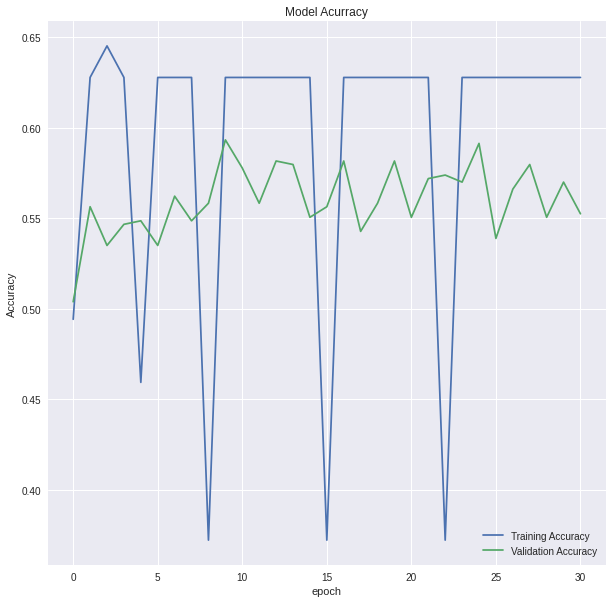

In [37]:
plt.plot(history.history['val_soft_acc'])
plt.plot(history.history['soft_acc'])
plt.title('Model Acurracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

Text(0.5, 1.0, 'Prices vs Predicted price Index')

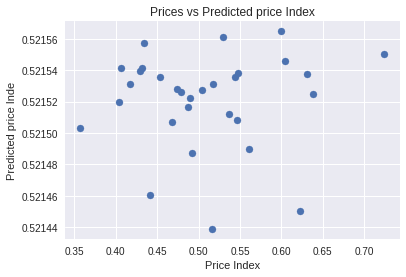

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(np.asarray(y_test), pred)
plt.xlabel("Price Index")
plt.ylabel("Predicted price Inde")
plt.title("Prices vs Predicted price Index")

In [39]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score

Y = np.asarray(y_test)
Y_hat = pred

def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2))

def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100

def root_mean_squared_log_error(y_true, y_pred): 
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

print('R2_Score')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[9], score_validation[9], r2_score(Y, Y_hat)))

print('Mean Squared Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[2], score_validation[2], MSE(Y, Y_hat)))

print('Mean Absolute Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[3], score_validation[3], MAE(Y, Y_hat)))

print('Root Mean Squared Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[4], score_validation[3], RMSE(Y, Y_hat)))

print('Mean Squared Logarithmic Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[7], score_validation[7], mean_squared_log_error(Y, Y_hat)))

print('Root Mean Squared Logarithmic Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[8], score_validation[8], root_mean_squared_log_error(Y, Y_hat)))

print('Mean Absolute Percentage Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[5], score_validation[3], MAPE(Y, Y_hat)))

print('Mean Percentage Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(score_train[6], score_validation[3], MPE(Y, Y_hat)))

print('Explained Variance Score(EVS) : {}|\n'.format(explained_variance_score(Y, Y_hat)))

R2_Score
----------------------------------------
train error: -776.2808837890625 |
valid error: -2777.076416015625 |
test error : -0.021666083233181643

Mean Squared Error
----------------------------------------
train error: 0.011522789485752583 |
valid error: 0.012793404050171375 |
test error : 0.006804721106870226

Mean Absolute Error
----------------------------------------
train error: 0.07329565286636353 |
valid error: 0.07674159854650497 |
test error : 0.0670321119450937

Root Mean Squared Error
----------------------------------------
train error: 0.08428310602903366 |
valid error: 0.07674159854650497 |
test error : 0.08249073346061499

Mean Squared Logarithmic Error
----------------------------------------
train error: 0.004923976492136717 |
valid error: 0.006010572891682386 |
test error : 0.0029488333077515726

Root Mean Squared Logarithmic Error
----------------------------------------
train error: 0.04797334969043732 |
valid error: 0.05115460604429245 |
test error : 0.0543

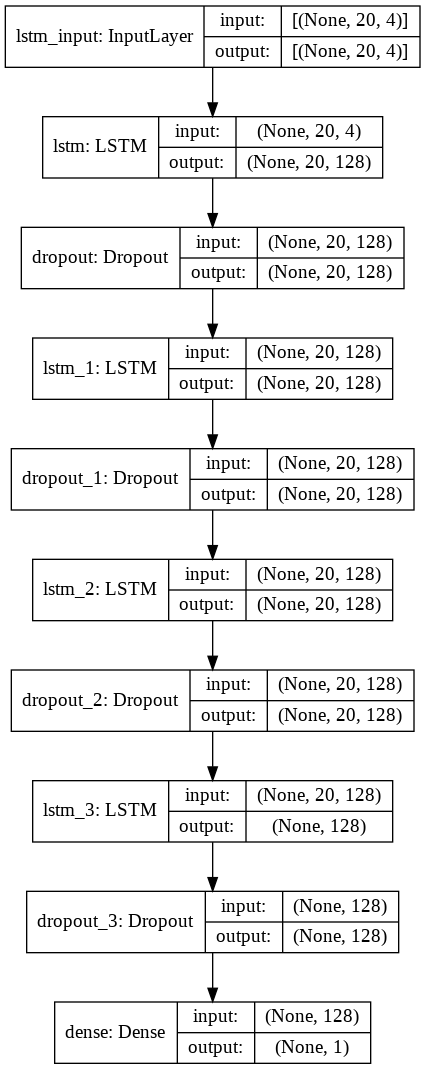

In [40]:
tf.keras.utils.plot_model(
    model,
    to_file="HS_LSTM.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,)

In [53]:
from keras import models
from keras import layers
from keras import backend as K

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))


def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    # 마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기 때문에 뉴런 수는 1개
    model = models.Sequential()
    model.add(LSTM(units = 128, return_sequences = True,  
               input_shape=(x_test.shape[1], x_test.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 128, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 128, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 128))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1))

    model.compile(optimizer='adam', loss= RMSE, metrics=[soft_acc])
    return model

# K-fold Cross Validation


>> train data의 일부를 validation set으로 사용하여 모델 성능을 평가하는 것은 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰도가 떨어집니다. k-fold Cross Validation은 Train 데이터셋을 균등하게 K개의 그룹으로 나누고 K-1개의 Train Fold와 1개의 Validation Fold를 이용하여 각 검증마다 Validation Fold를 바꿔가며 총 K회 검증을 합니다


In [54]:
# k-겹 교차 검증 실시
# 현재 10겹이므로 한번 실행마다 100번 반복하고 결국 1000번을 훈련하게 된다
# #0의 10개의 mae평균, #1의 10개의 mae평균,,,100번째의 10개의 mae평균,,,이렇게 500개의 mae를 구한다


k = 10

num_val_samples = len(x_train) // k 
num_epochs = 200
all_scores = []

all_RMSE_histories_train = []

all_RMSE_histories_valid = []

all_Soft_acc_histories_train = []

all_Soft_acc_histories_valid = []

for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    x_valid = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    y_valid = y_train[i * num_val_samples: (i + 1) * num_val_samples]
 
    # 훈련 데이터 준비: 다른 분할 전체
    partial_x_train = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)
 
    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # model.fit()함수로 회귀 모델을 학습시킨다
    history = model.fit(partial_x_train, partial_y_train,
                        validation_data=(x_valid, y_valid),
                        epochs=num_epochs, batch_size=2, verbose=1)
    
    score_train = model.evaluate(partial_x_train, partial_y_train, batch_size=2)
    score_validation = model.evaluate(x_valid, y_valid, batch_size=2)

    RMSE_history_valid = history.history['val_loss']
    all_RMSE_histories_valid.append(RMSE_history_valid)
    
    RMSE_history_train = history.history['loss']
    all_RMSE_histories_train.append(RMSE_history_train)
    
    RMSE_history_train = history.history['soft_acc']
    all_Soft_acc_histories_train.append(RMSE_history_train)
    
    RMSE_history_valid = history.history['val_soft_acc']
    all_Soft_acc_histories_valid.append(RMSE_history_valid)
    
 
average_RMSE_valid = [np.mean([x[i] for x in all_RMSE_histories_valid]) for i in range(num_epochs)]

average_RMSE_train = [np.mean([x[i] for x in all_RMSE_histories_train]) for i in range(num_epochs)]

average_Soft_acc_train = [np.mean([x[i] for x in all_Soft_acc_histories_train]) for i in range(num_epochs)]

average_Soft_acc_valid = [np.mean([x[i] for x in all_Soft_acc_histories_valid]) for i in range(num_epochs)]

처리중인 폴드 # 0
Epoch 1/100
8/8 [==============================] - 6s 213ms/step - loss: 0.3402 - soft_acc: 0.4483 - val_loss: 0.1856 - val_soft_acc: 0.3725
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1545 - soft_acc: 0.4678 - val_loss: 0.1584 - val_soft_acc: 0.3725
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1305 - soft_acc: 0.4905 - val_loss: 0.1127 - val_soft_acc: 0.6078
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.1158 - soft_acc: 0.5323 - val_loss: 0.1094 - val_soft_acc: 0.6275
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.1119 - soft_acc: 0.5663 - val_loss: 0.1123 - val_soft_acc: 0.6275
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1208 - soft_acc: 0.5601 - val_loss: 0.1158 - val_soft_acc: 0.5686
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 0.1010 - soft_acc: 0.5708 - val_loss: 0.1276 - val_soft_acc: 0.3529
Epoch 8

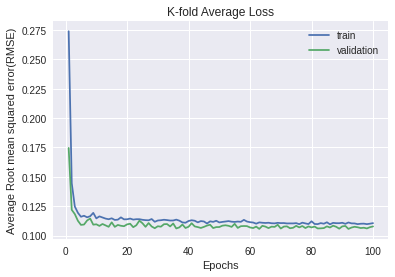

In [55]:
plt.plot(range(1, len(average_RMSE_train) + 1), average_RMSE_train)
plt.plot(range(1, len(average_RMSE_valid) + 1), average_RMSE_valid)
plt.title('K-fold Average Loss')
plt.xlabel('Epochs')
plt.ylabel('Average Root mean squared error(RMSE)')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

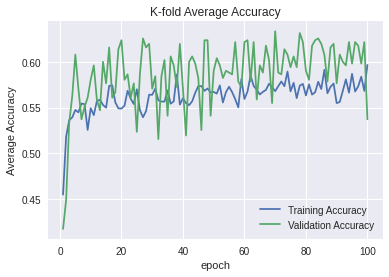

In [56]:
plt.plot(range(1, len(average_Soft_acc_train) + 1), average_Soft_acc_train)
plt.plot(range(1, len(average_Soft_acc_valid) + 1), average_Soft_acc_valid)
plt.title('K-fold Average Accuracy')
plt.ylabel('Average Accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()